<a href="https://colab.research.google.com/github/BikramKC7/Machine-Learning/blob/main/K_Mean_Clustering_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [64]:
import pandas as pd
import numpy as np

In [65]:
players = pd.read_csv('/content/drive/MyDrive/Machine Learning/players_22.csv')

/tmp/ipython-input-65-2853781717.py:1: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  players = pd.read_csv('/content/drive/MyDrive/Machine Learning/players_22.csv')


In [66]:
players.head()

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


In [67]:
features = ['overall','potential','wage_eur','value_eur','age']

In [68]:
players = players.dropna(subset=features)

In [69]:
data = players[features].copy()

In [70]:
data

,overall,potential,wage_eur,value_eur,age
0,93,93,320000.0,78000000.0,34
1,92,92,270000.0,119500000.0,32
2,91,91,270000.0,45000000.0,36
3,91,91,270000.0,129000000.0,29
4,91,91,350000.0,125500000.0,30
...,...,...,...,...,...
19234,47,52,1000.0,70000.0,22
19235,47,59,500.0,110000.0,19
19236,47,55,500.0,100000.0,21
19237,47,60,500.0,110000.0,19


In [71]:
# Step 1: Scale the data
# Step 2: Initialize the random centroids
# Step 3: Label each data point to the centroids
# Step 4: Update the centroids
# Step 5: Repeat steps 3 and 4 until centroids changing

In [72]:
# Step 1: Scale the data
data = (data - data.min())/(data.max()-data.min()) * 9 + 1

In [73]:
data.describe()

,overall,potential,wage_eur,value_eur,age
count,19165.000000,19165.000000,19165.000000,19165.000000,19165.000000
mean,4.670472,5.319998,1.219443,1.131826,4.063345
std,1.346635,1.191076,0.501528,0.353229,1.575838
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.739130,4.521739,1.012876,1.021620,2.666667
50%,4.717391,5.304348,1.064378,1.044817,4.000000
75%,5.500000,6.086957,1.193133,1.092370,5.333333
max,10.000000,10.000000,10.000000,10.000000,10.000000


In [101]:
# Step 2: Initialize the random centroids
def random_centroids(data,k):
  centroids = []
  for i in range(k):
    centroid = data.apply(lambda x: float(x.sample()))
    centroids.append(centroid)
  return pd.concat(centroids,axis=1)

In [102]:
centroids = random_centroids(data,5)
centroids

/tmp/ipython-input-101-2950423282.py:5: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  centroid = data.apply(lambda x: float(x.sample()))


,0,1,2,3,4
overall,5.500000,5.108696,4.130435,5.695652,4.130435
potential,1.391304,5.500000,5.891304,6.282609,5.500000
wage_eur,1.000000,1.000000,1.450644,1.141631,1.270386
value_eur,1.189797,1.021620,1.037857,1.021620,1.087731
age,2.333333,8.000000,4.666667,3.333333,6.666667


In [76]:
# Step 3: Label each data point to the centroids
def get_labels(data,centroids):
  distances = centroids.apply(lambda x:np.sqrt(((data-x)**2).sum(axis=1)))
  return distances.idxmin(axis=1)

In [77]:
labels = get_labels(data,centroids)

In [78]:
labels.value_counts()

,count
1,6205
3,4740
0,4456
2,2051
4,1713


In [79]:
def new_centroids(data,labels,k):
  return data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T

In [80]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [90]:
def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.figure(figsize=(8,6))
    plt.title(f'Iteration {iteration}')
    plt.scatter(data_2d[:,0], data_2d[:,1], c=labels, cmap='viridis', alpha=0.6)
    plt.scatter(centroids_2d[:,0], centroids_2d[:,1], marker='X', s=200, c='red')
    plt.show()

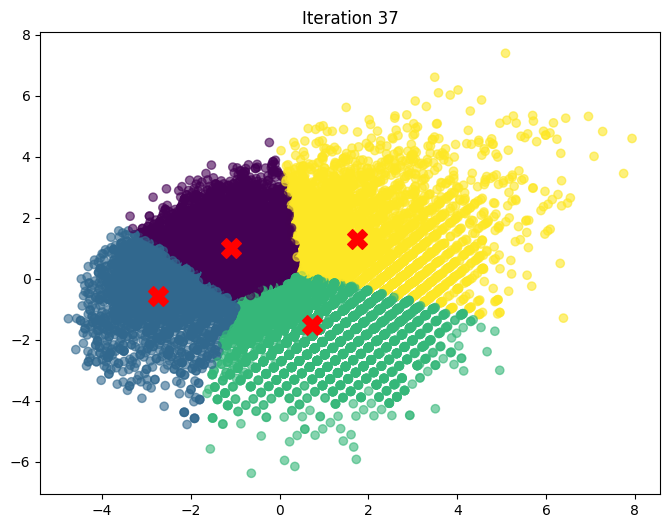

In [92]:
max_iterations = 100
k = 4
centroids = random_centroids(data,k)
old_centroids = pd.DataFrame()
iteration=1

while iteration < max_iterations and not centroids.equals(old_centroids):
  old_centroids = centroids
  labels = get_labels(data,centroids)
  centroids = new_centroids(data,labels,k)
  plot_clusters(data,labels,centroids,iteration)
  iteration +=1

In [93]:
centroids

,0,1,2,3
overall,4.308463,2.581217,4.651326,6.407184
potential,5.836061,4.273632,4.377841,6.520606
wage_eur,1.074077,1.017245,1.089579,1.615210
value_eur,1.062697,1.013417,1.035761,1.371856
age,2.701158,2.485968,5.439415,4.431376


In [95]:
players[labels==0] [["short_name"]+features]

,short_name,overall,potential,wage_eur,value_eur,age
2415,A. Aouchiche,74,82,9000.0,9000000.0,18
2866,Osvaldão Murilo,73,73,9000.0,3100000.0,21
2871,Nicolás Formido,73,73,16000.0,3600000.0,21
2877,Neviano Neves,73,73,17000.0,3600000.0,21
2884,Luis Couprins,73,73,9000.0,3200000.0,21
...,...,...,...,...,...,...
18124,M. Løvik,55,76,500.0,375000.0,17
18125,J. Hernández,55,77,500.0,400000.0,17
18227,K. Urbański,54,79,550.0,350000.0,16
18311,S. Denham,54,77,500.0,325000.0,18
